# Overfitting and Underfitting
> Maintainer: Huong Nguyen (huong.nguyen@fansipan.io)

- Producing overfitting/underfitting
- Providing solution of avoiding overfitting/underfitting
- Demo: handwritten digits recognition using Keras

---
**References**:
1. [Overfit and underfit](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

## What is overfitting and underfitting?

Overfitting and underfitting are the common problems of a neural network model.

Overfitting model is a model that has good performance on training set (already known stuffs) but low performance on test set (new stuffs).

Underfitting model is a model that has slow performance on both traing set and test set. It is easy to see that the model is not our desired model.

## 1. Producing overfitting/underfitting?

By observing the training history, we are able to know whether a model is overfitting or underfitting.

**Underfitting**

_Loss history:_
- Both line doesn't go up anymore

_Accuracy history:_
- Both line doesn't go up anymore
- The accuracy is very low (<=0.5)

**Overfitting**

_Loss history:_
- The line of validation and trainig is separated
- Training line is below the validation line
- Both line doesn't go up anymore

_Accuracy history:_
- The line of validation and trainig is separated
- Training line is above the validation line
- Both line doesn't go up anymore
- The accuracy is quite high (>=0.8)





## 2. Providing solution of avoiding overfitting/underfitting

**Underfitting**
- Adjust the model parameters (layers, nodes, activations, optimizer, batch size, espoch, etc)
- Add more training data

**Overfitting**
- Add more traing data
- Reduce the capacity of the network

## 3. Demo: Handwritten digits recognition using Keras
1. produce underfitting
2. produce overfitting
3. produce "just right/good fit"

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.losses import mean_squared_error, categorical_crossentropy
from keras.optimizers import SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt

def plot_dataset(x_train, y_train):
  plt.figure(figsize=(6,7.5))
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
    plt.imshow(x_train[i])
  plt.show()

def plot_training_history(history):
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  plt.show()

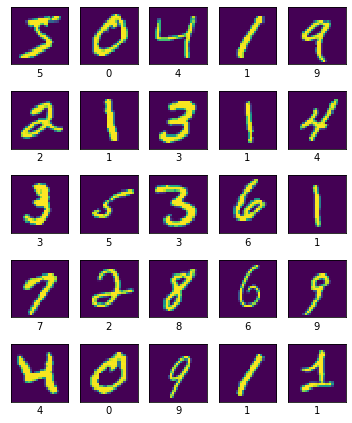

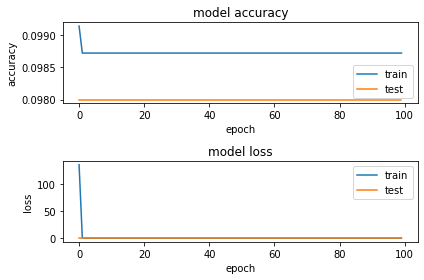

In [0]:
# 1. undefit
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plot_dataset(x_train, y_train)

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# increase the capacity of the network.
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=10, activation="relu"))

model.compile(optimizer=SGD(lr=0.01), loss=mean_squared_error, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1000, epochs=100, verbose=0, validation_data=(x_test, y_test))

plot_training_history(history)

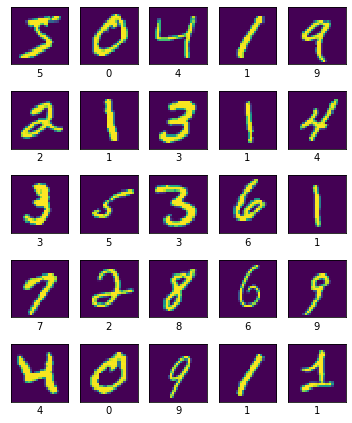

x_train.shape (1500, 28, 28)
y_train.shape (1500, 10)


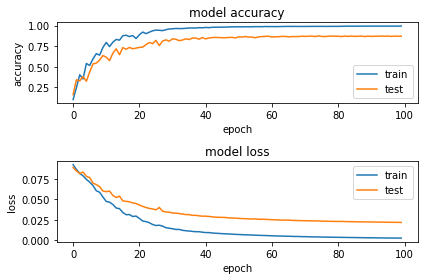

In [0]:
# 2. overfit
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plot_dataset(x_train, y_train)

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# reduce training data
x_train, y_train = x_train[:1500, :], y_train[:1500]
x_test, y_test = x_test[:500, :], y_test[:500]
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

# increase the capacity of the network.
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=4096, activation="tanh"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="sigmoid"))
model.add(Dense(units=10, activation="softmax"))

model.compile(optimizer=SGD(lr=0.4), loss=mean_squared_error, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=500, epochs=100, verbose=0, validation_data=(x_test, y_test))

plot_training_history(history)

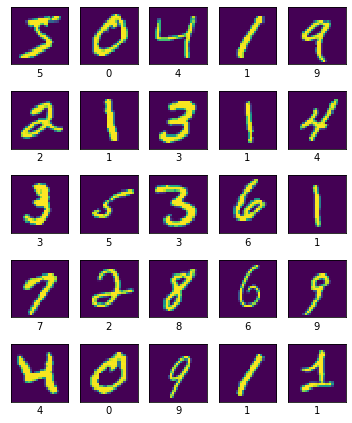

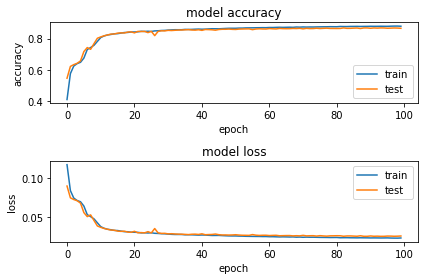

In [0]:
# 3. goodfit
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plot_dataset(x_train, y_train)

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=218, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(optimizer=SGD(lr=0.05), loss=mean_squared_error, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=500, epochs=100, verbose=0, validation_data=(x_test, y_test))

plot_training_history(history)